In [32]:
import pandas as pd
import tensorflow as ts
import numpy as np
import matplotlib.pyplot as plt
import time
import os 
import json
import sklearn
from sklearn.model_selection import train_test_split
import re
import string

dataset = pd.read_json("data.json")
print(dataset)
print('|||||||||||||||||||||||||||||||||||||||||')

print(dataset.columns)
print('|||||||||||||||||||||||||||||||||||||||||')

ingridients = []
for i, name in enumerate(dataset.ingredients):
    for j, name1 in enumerate(dataset.ingredients[i]):
        ingridients.append(name1)

all_unique_ingridients = pd.unique(ingridients)
print(all_unique_ingridients)
print('|||||||||||||||||||||||||||||||||||||||||')


          id      cuisine                                        ingredients
0      10259        greek  [romaine lettuce, black olives, grape tomatoes...
1      25693  southern_us  [plain flour, ground pepper, salt, tomatoes, g...
2      20130     filipino  [eggs, pepper, salt, mayonaise, cooking oil, g...
3      22213       indian                [water, vegetable oil, wheat, salt]
4      13162       indian  [black pepper, shallots, cornflour, cayenne pe...
...      ...          ...                                                ...
39769  29109        irish  [light brown sugar, granulated sugar, butter, ...
39770  11462      italian  [KRAFT Zesty Italian Dressing, purple onion, b...
39771   2238        irish  [eggs, citrus fruit, raisins, sourdough starte...
39772  41882      chinese  [boneless chicken skinless thigh, minced garli...
39773   2362      mexican  [green chile, jalapeno chilies, onions, ground...

[39774 rows x 3 columns]
|||||||||||||||||||||||||||||||||||||||||
Index(['

<Axes: xlabel='cuisine'>

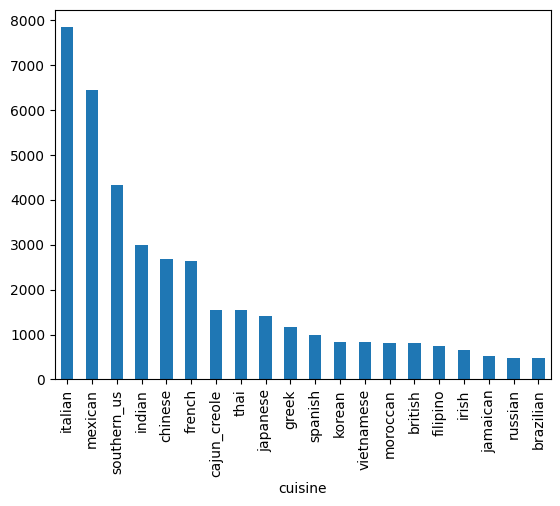

In [2]:
dataset.cuisine.value_counts().plot.bar()

<Axes: >

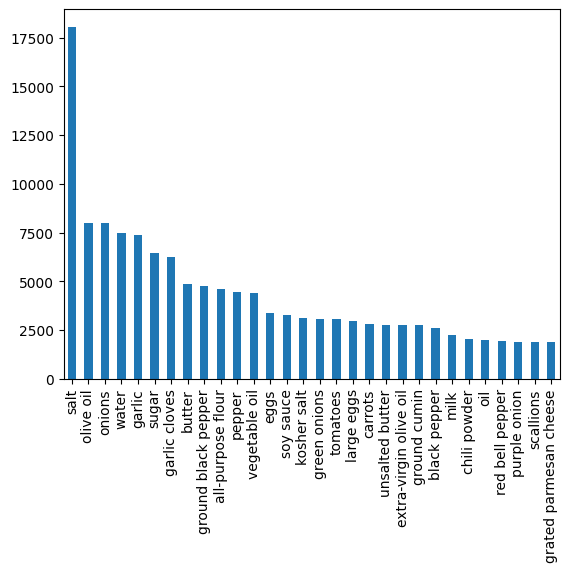

In [3]:
ingredients_list = [ing for ingredients in dataset.ingredients for ing in ingredients]

from collections import Counter
ingredients_count = pd.Series(dict(Counter(','.join(ingredients_list).split(',')))).sort_values(ascending=False)
top30ingredients = ingredients_count.head(30)
top30ingredients.plot.bar()

<Axes: >

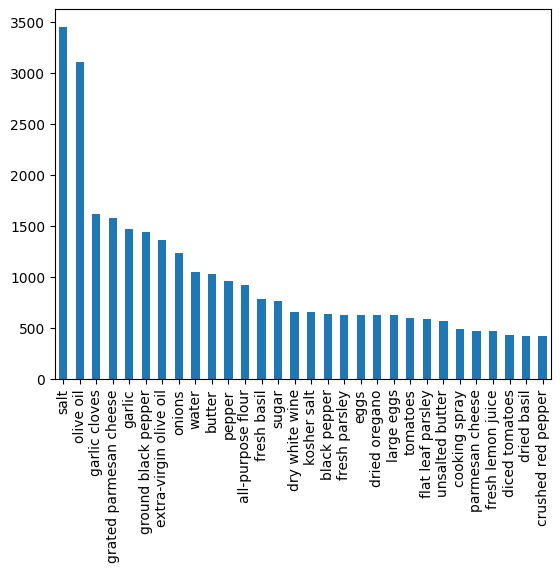

In [4]:
ingredients_list = [ing for ingredients in dataset.loc[dataset.cuisine == 'italian']['ingredients'] for ing in ingredients]

from collections import Counter
ingredients_count = pd.Series(dict(Counter(','.join(ingredients_list).split(',')))).sort_values(ascending=False)
top30ingredients = ingredients_count.head(30)
top30ingredients.plot.bar()

<Axes: >

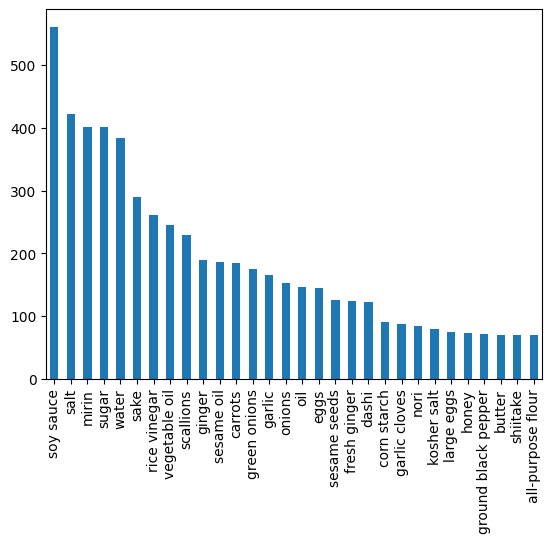

In [5]:
ingredients_list = [ing for ingredients in dataset.loc[dataset.cuisine == 'japanese']['ingredients'] for ing in ingredients]

from collections import Counter
ingredients_count = pd.Series(dict(Counter(','.join(ingredients_list).split(',')))).sort_values(ascending=False)
top30ingredients = ingredients_count.head(30)
top30ingredients.plot.bar()

<Axes: >

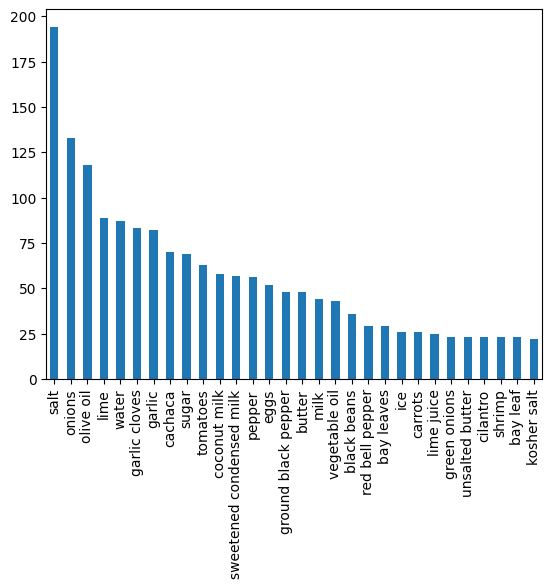

In [6]:
ingredients_list = [ing for ingredients in dataset.loc[dataset.cuisine == 'brazilian']['ingredients'] for ing in ingredients]

from collections import Counter
ingredients_count = pd.Series(dict(Counter(','.join(ingredients_list).split(',')))).sort_values(ascending=False)
top30ingredients = ingredients_count.head(30)
top30ingredients.plot.bar()

In [33]:
class_label_len = len(dataset.cuisine.unique())
print(class_label_len)

20


In [34]:
b = []
for i, name in enumerate(dataset.ingredients):
    for j, name1 in enumerate(dataset.ingredients[i]):
        b.append(name1)

all_unique_ingridients = pd.unique(b)
len_unique_ingridients = len(all_unique_ingridients)
print(len_unique_ingridients)

6714


In [35]:
class_label = dataset.cuisine.unique() 
class_label = dict(zip(class_label,[i for i in range(class_label_len)])) 
print(class_label)

{'greek': 0, 'southern_us': 1, 'filipino': 2, 'indian': 3, 'jamaican': 4, 'spanish': 5, 'italian': 6, 'mexican': 7, 'chinese': 8, 'british': 9, 'thai': 10, 'vietnamese': 11, 'cajun_creole': 12, 'brazilian': 13, 'french': 14, 'japanese': 15, 'irish': 16, 'korean': 17, 'moroccan': 18, 'russian': 19}


In [36]:
dataset.cuisine = dataset.cuisine.replace((class_label))
print(dataset)

          id  cuisine                                        ingredients
0      10259        0  [romaine lettuce, black olives, grape tomatoes...
1      25693        1  [plain flour, ground pepper, salt, tomatoes, g...
2      20130        2  [eggs, pepper, salt, mayonaise, cooking oil, g...
3      22213        3                [water, vegetable oil, wheat, salt]
4      13162        3  [black pepper, shallots, cornflour, cayenne pe...
...      ...      ...                                                ...
39769  29109       16  [light brown sugar, granulated sugar, butter, ...
39770  11462        6  [KRAFT Zesty Italian Dressing, purple onion, b...
39771   2238       16  [eggs, citrus fruit, raisins, sourdough starte...
39772  41882        8  [boneless chicken skinless thigh, minced garli...
39773   2362        7  [green chile, jalapeno chilies, onions, ground...

[39774 rows x 3 columns]


In [37]:
data = dataset.drop(columns='id')
print(dataset)

          id  cuisine                                        ingredients
0      10259        0  [romaine lettuce, black olives, grape tomatoes...
1      25693        1  [plain flour, ground pepper, salt, tomatoes, g...
2      20130        2  [eggs, pepper, salt, mayonaise, cooking oil, g...
3      22213        3                [water, vegetable oil, wheat, salt]
4      13162        3  [black pepper, shallots, cornflour, cayenne pe...
...      ...      ...                                                ...
39769  29109       16  [light brown sugar, granulated sugar, butter, ...
39770  11462        6  [KRAFT Zesty Italian Dressing, purple onion, b...
39771   2238       16  [eggs, citrus fruit, raisins, sourdough starte...
39772  41882        8  [boneless chicken skinless thigh, minced garli...
39773   2362        7  [green chile, jalapeno chilies, onions, ground...

[39774 rows x 3 columns]


In [38]:
dict_unique_ingridients = dict(zip(all_unique_ingridients,[i for i in range(len(all_unique_ingridients))])) 
print(dict_unique_ingridients)

{'romaine lettuce': 0, 'black olives': 1, 'grape tomatoes': 2, 'garlic': 3, 'pepper': 4, 'purple onion': 5, 'seasoning': 6, 'garbanzo beans': 7, 'feta cheese crumbles': 8, 'plain flour': 9, 'ground pepper': 10, 'salt': 11, 'tomatoes': 12, 'ground black pepper': 13, 'thyme': 14, 'eggs': 15, 'green tomatoes': 16, 'yellow corn meal': 17, 'milk': 18, 'vegetable oil': 19, 'mayonaise': 20, 'cooking oil': 21, 'green chilies': 22, 'grilled chicken breasts': 23, 'garlic powder': 24, 'yellow onion': 25, 'soy sauce': 26, 'butter': 27, 'chicken livers': 28, 'water': 29, 'wheat': 30, 'black pepper': 31, 'shallots': 32, 'cornflour': 33, 'cayenne pepper': 34, 'onions': 35, 'garlic paste': 36, 'lemon juice': 37, 'chili powder': 38, 'passata': 39, 'oil': 40, 'ground cumin': 41, 'boneless chicken skinless thigh': 42, 'garam masala': 43, 'double cream': 44, 'natural yogurt': 45, 'bay leaf': 46, 'sugar': 47, 'fresh ginger root': 48, 'ground cinnamon': 49, 'vanilla extract': 50, 'ground ginger': 51, 'powde

In [39]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
update_dataset_one_more = pd.DataFrame(mlb.fit_transform(dataset.ingredients),columns=mlb.classes_, index=dataset.index)

In [40]:
update_dataset_one_more.insert(0, "cuisine", dataset["cuisine"])

In [41]:
update_dataset_one_more

,cuisine,( oz.) tomato sauce,( oz.) tomato paste,(10 oz.) frozen chopped spinach,"(10 oz.) frozen chopped spinach, thawed and squeezed dry",(14 oz.) sweetened condensed milk,(14.5 oz.) diced tomatoes,(15 oz.) refried beans,1% low-fat buttermilk,1% low-fat chocolate milk,...,yukon gold potatoes,yuzu,yuzu juice,za'atar,zest,zesty italian dressing,zinfandel,ziti,zucchini,zucchini blossoms
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39769,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39770,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39771,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39772,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
Y = dataset.cuisine
X = update_dataset_one_more.drop(columns='cuisine', axis = 1)


In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3)


In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder

logisticRegr = LogisticRegression(random_state=54)
logisticRegr.fit(X_train, Y_train)

c:\Users\kache\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=54)

In [45]:
Y_pred = logisticRegr.predict(X_test)
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.78      0.73      0.75       345
           1       0.68      0.79      0.73      1279
           2       0.75      0.55      0.64       238
           3       0.87      0.88      0.87       865
           4       0.81      0.62      0.71       165
           5       0.63      0.46      0.53       315
           6       0.79      0.88      0.83      2359
           7       0.88      0.92      0.90      1953
           8       0.79      0.83      0.81       806
           9       0.63      0.37      0.47       273
          10       0.79      0.74      0.76       435
          11       0.70      0.59      0.64       233
          12       0.75      0.66      0.70       464
          13       0.76      0.58      0.66       129
          14       0.61      0.63      0.62       822
          15       0.78      0.68      0.73       423
          16       0.65      0.47      0.55       203
          17       0.79    

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [47]:
RandForest= RandomForestClassifier(n_estimators=100)
RandForest.fit(X_train_scaled, Y_train)

RandomForestClassifier()

In [48]:
Y_pred = RandForest.predict(X_test_scaled)
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.80      0.53      0.64       345
           1       0.61      0.74      0.67      1279
           2       0.77      0.45      0.57       238
           3       0.77      0.88      0.82       865
           4       0.88      0.32      0.47       165
           5       0.70      0.18      0.28       315
           6       0.69      0.90      0.78      2359
           7       0.79      0.91      0.84      1953
           8       0.66      0.85      0.74       806
           9       0.53      0.15      0.23       273
          10       0.76      0.65      0.70       435
          11       0.67      0.40      0.50       233
          12       0.81      0.64      0.71       464
          13       0.78      0.41      0.54       129
          14       0.55      0.46      0.50       822
          15       0.75      0.59      0.66       423
          16       0.67      0.31      0.42       203
          17       0.86    

In [49]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [50]:
kmeans= KMeans(n_clusters=20)
kmeans.fit(X_train_scaled, Y_train)

c:\Users\kache\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=20)

In [51]:
Y_pred = kmeans.predict(X_test_scaled)
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       345
           1       0.10      0.00      0.01      1279
           2       0.00      0.00      0.00       238
           3       0.00      0.00      0.00       865
           4       0.00      0.00      0.00       165
           5       0.02      0.10      0.04       315
           6       0.00      0.00      0.00      2359
           7       0.00      0.00      0.00      1953
           8       0.00      0.00      0.00       806
           9       0.00      0.00      0.00       273
          10       0.00      0.00      0.00       435
          11       0.00      0.00      0.00       233
          12       0.00      0.00      0.00       464
          13       0.00      0.00      0.00       129
          14       0.00      0.00      0.00       822
          15       0.00      0.00      0.00       423
          16       0.01      0.62      0.02       203
          17       0.00    

c:\Users\kache\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kache\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kache\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,